In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)

#seaborn Gr-Bk-Rd palette
pal = sns.diverging_palette(127.7, 12.2, l=53.4, n=255, center="dark")

pd.set_option('display.max_columns', 500)

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test #Cox Proportional-Hazards Model을 적용함. multivariate_logrank_test, pairwise_logrank_test, survival_difference_at_fixed_point_in_time_test 이용 가능
import matplotlib.pyplot as plt
kmf = KaplanMeierFitter()
cph = CoxPHFitter()

from scipy import stats

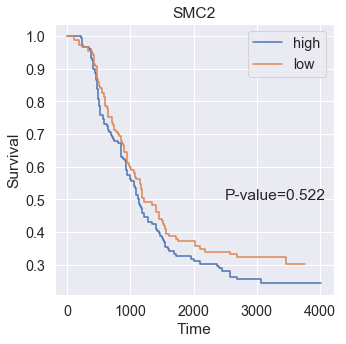

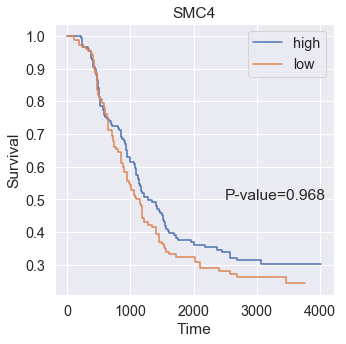

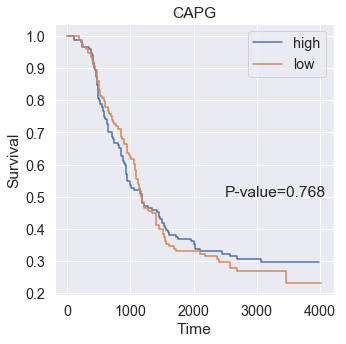

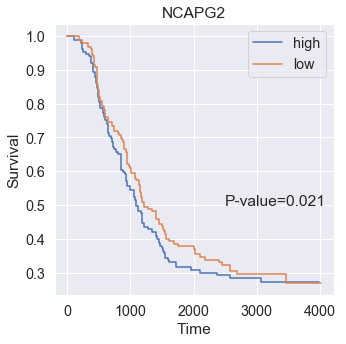

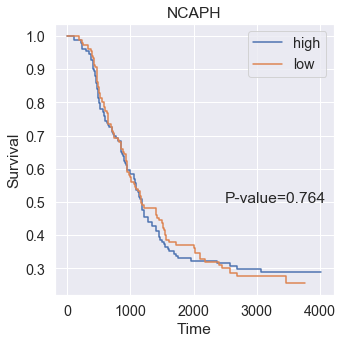

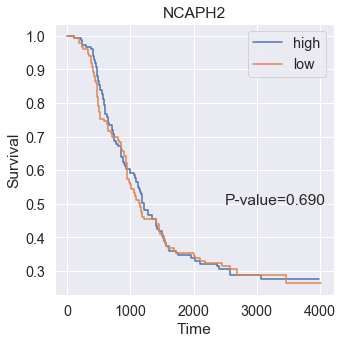

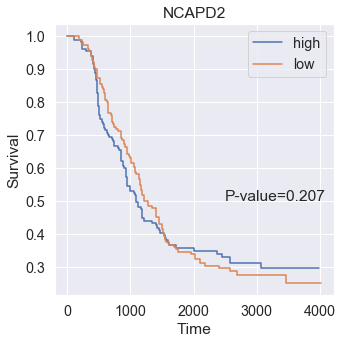

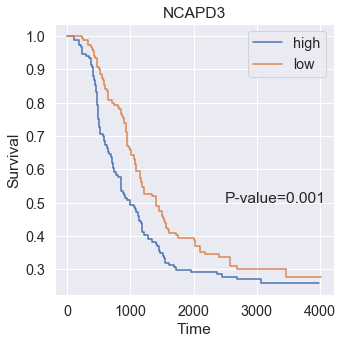

In [133]:
genes = ['SMC2','SMC4','CAPG','NCAPG2','NCAPH','NCAPH2','NCAPD2','NCAPD3']

for target in genes:
    #data input
    table = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/all_phase2_target_2018_pub_clinical_data.csv")
    rna = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/data_expression_median.txt", sep = '\t', header = None).T

    rna.columns = rna.iloc[0,:]
    rna = rna[2:]

    table = pd.merge(table, rna, left_on = 'Sample ID', right_on = 'Hugo_Symbol')

    #converting data: vital_status >>> bool, days_to_birth >>> abs(int)
    table['Overall Survival Status'] = table['Overall Survival Status'] == 'DECEASED'
    table['Overall Survival Status'] = table['Overall Survival Status'].astype(int)
    table['Overall Survival Days'] = abs(table['Overall Survival Days'].astype(int))

    table = table.sort_values(["%s" %target], ascending=[False])
    table = table.reset_index(drop=True)

    table = table.loc[:,['Overall Survival Status', 'Overall Survival Days', "%s" %target]]    
    
    fig, ax = plt.subplots(figsize=(5,5))

    #평균 초과/미만인 그룹을 나누어 생존분석 수행

    mask = table["%s" %target] > table["%s" %target].median()
    kmf.fit(table['Overall Survival Days'][mask], table['Overall Survival Status'][mask], label='high')
    kmf.plot(ax=ax, ci_show=False)

    mask2 = table["%s" %target] < table["%s" %target].median()
    kmf.fit(table['Overall Survival Days'][mask2], table['Overall Survival Status'][mask2], label='low')
    kmf.plot(ax=ax, ci_show=False)


    table["%s" %target] = table["%s" %target] > table["%s" %target].mean()
    cph = CoxPHFitter().fit(table, 'Overall Survival Days', 'Overall Survival Status')
    pvalue = cph.summary['p']
    ax.text(2500,0.5,'P-value=%.3f'% pvalue)

    ax.set_xlabel('Time')
    ax.set_ylabel('Survival')
    ax.set_title('%s' %target)

    plt.savefig('./survival/%s.png' %target, dpi=300, bbox_inches='tight')

In [134]:
genes = ['SMC2']

for target in genes:
    #data input
    table = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/all_phase2_target_2018_pub_clinical_data.csv")
    rna = pd.read_csv("./cBioPotal/all_phase2_target_2018_pub_(pediatric)/data_expression_median.txt", sep = '\t', header = None).T

    rna.columns = rna.iloc[0,:]
    rna = rna[2:]

    table = pd.merge(table, rna, left_on = 'Sample ID', right_on = 'Hugo_Symbol')

    #converting data: vital_status >>> bool, days_to_birth >>> abs(int)
    table['Overall Survival Status'] = table['Overall Survival Status'] == 'DECEASED'
    table['Overall Survival Status'] = table['Overall Survival Status'].astype(int)
    table['Overall Survival Days'] = abs(table['Overall Survival Days'].astype(int))

    table = table.sort_values(["%s" %target], ascending=[False])
    table = table.reset_index(drop=True)

    table = table.loc[:,['Overall Survival Status', 'Overall Survival Days', "%s" %target]]  

In [173]:
temp = table['%s' %target]

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0.

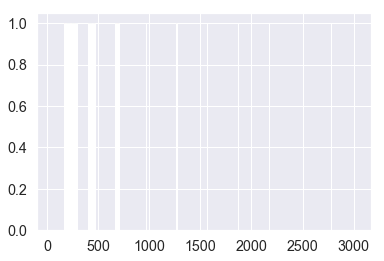

In [178]:
plt.hist(temp)

In [175]:
temp

0      3054.45
1      2154.39
2      1932.37
3      1596.47
4      1529.62
5      1444.01
6       1372.8
7       1337.8
8       1255.6
9      1195.27
10      1106.9
11     1036.74
12     1012.12
13     931.274
14     924.008
15     904.418
16     897.857
17     875.228
18     856.352
19     850.433
20     841.063
21     839.189
22      836.67
23     836.077
24     817.877
25     813.543
26     795.911
27     795.501
28     791.544
29     777.262
        ...   
271    126.072
272     124.26
273    123.458
274    119.332
275    115.938
276     114.47
277    112.209
278    106.291
279    102.464
280    99.4484
281     96.521
282    95.8767
283    93.8102
284    87.9684
285     83.427
286    81.3718
287    80.5729
288    71.5182
289    70.0116
290    69.1337
291     65.645
292    65.3241
293    61.3708
294    57.5574
295    55.3183
296    53.0006
297    49.3407
298    31.6388
299    31.0359
300    16.5769
Name: SMC2, Length: 301, dtype: object